In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt
import random
import math 
!pip install opencv-python

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")   

# 1. 레이블링

In [2]:
src = np.array(    [[0, 0, 1, 1, 0, 0, 0, 0],
                    [1, 1, 1, 1, 0, 0, 1, 0],
                    [1, 1, 1, 1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 1, 1, 0],
                    [0, 0, 0, 1, 1, 1, 1, 0],
                    [0, 0, 0, 1, 0, 0, 1, 0],
                    [0, 0, 1, 1, 1, 1, 1, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0]]).astype(np.uint8)

src = src * 255
print(src)

[[  0   0 255 255   0   0   0   0]
 [255 255 255 255   0   0 255   0]
 [255 255 255 255   0   0   0   0]
 [  0   0   0   0   0 255 255   0]
 [  0   0   0 255 255 255 255   0]
 [  0   0   0 255   0   0 255   0]
 [  0   0 255 255 255 255 255   0]
 [  0   0   0   0   0   0   0   0]]


In [3]:
cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src)
    
print(cnt)
print(labels)
print(stats)
print(centroids)    

4
[[0 0 1 1 0 0 0 0]
 [1 1 1 1 0 0 2 0]
 [1 1 1 1 0 0 0 0]
 [0 0 0 0 0 3 3 0]
 [0 0 0 3 3 3 3 0]
 [0 0 0 3 0 0 3 0]
 [0 0 3 3 3 3 3 0]
 [0 0 0 0 0 0 0 0]]
[[ 0  0  8  8 40]
 [ 0  0  4  3 10]
 [ 6  1  1  1  1]
 [ 2  3  5  4 13]]
[[3.575      3.725     ]
 [1.7        1.2       ]
 [6.         1.        ]
 [4.46153846 4.76923077]]


In [4]:
src = cv2.imread('keyboard.bmp', cv2.IMREAD_GRAYSCALE)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)

In [5]:
print(cnt)
print(stats)

38
[[     0      0    512    512 256750]
 [   102     30     23     29    341]
 [   276     32     23     27    259]
 [   451     36      9     36    168]
 [   278     45      1      1      1]
 [   102     95     21     33    230]
 [   274     97     21     34    373]
 [   445     99     21     34    366]
 [   387    149      1      1      1]
 [    16    198     34     38    350]
 [   189    200     29     38    452]
 [   370    201      8     38    221]
 [   197    253      1      1      1]
 [   271    258     14     40    245]
 [   441    260     14     40    239]
 [    78    272     36     25    313]
 [   135    310      1      1      1]
 [   302    312      1      1      1]
 [   470    314      1      2      2]
 [   121    320      1      1      1]
 [   247    320      1      1      1]
 [   283    331      1      1      1]
 [    60    365     29     37    469]
 [   231    366     20     37    265]
 [   398    366     30     38    470]
 [   344    394      1      1      1]
 [   344 

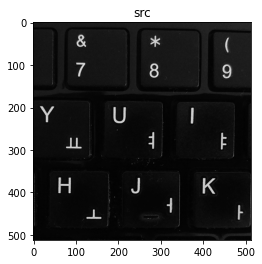

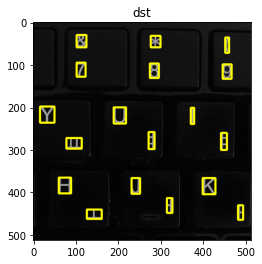

In [6]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(1, cnt):
        (x, y, w, h, area) = stats[i]

        if area < 20:
            continue

        pt1 = (x, y)
        pt2 = (x + w, y + h)
        cv2.rectangle(dst, pt1, pt2, (0, 255, 255), 4)

imshow('src', src); plt.show()
imshow('dst', dst); plt.show()

# 2. Contour

### 1) findContours  
896개의 픽셀과 특정 위치에 있는것,

896 [[ 50 200]]
796 [[50 50]]


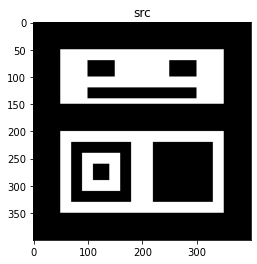

In [7]:
src = cv2.imread('contours.bmp', cv2.IMREAD_GRAYSCALE)
contours, _ = cv2.findContours(src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

imshow("src", src)

for i in range(len(contours)) :
    print(len(contours[i]),  contours[i][0])

심플로하면 점이 네개밖에안나온다. 

In [8]:
contours, _ = cv2.findContours(src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)) :
    print(len(contours[i]),  contours[i][0])

4 [[ 50 200]]
4 [[50 50]]


리스트로하면 전체가 다 리턴된다. 모든 컨투어가 다 리턴된다.
8개라는건 좀 가장자리가 각져져서 그런거다.

In [9]:
contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)) :
    print(len(contours[i]),  contours[i][0])

8 [[109 260]]
4 [[ 90 240]]
8 [[219 220]]
8 [[ 69 220]]
4 [[ 50 200]]
8 [[ 99 120]]
8 [[249  70]]
8 [[99 70]]
4 [[50 50]]


첫번쨰 컨투어

In [10]:
contours[0]

array([[[109, 260]],

       [[110, 259]],

       [[139, 259]],

       [[140, 260]],

       [[140, 289]],

       [[139, 290]],

       [[110, 290]],

       [[109, 289]]], dtype=int32)

In [11]:
src = cv2.imread('contours.bmp', cv2.IMREAD_GRAYSCALE)

contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [19]:
print(len(contours))
for i in range(len(contours)) :
    print(len(contours[i]),  contours[i][0]) #점 120개,모든 컨투어에 출력을 해봤다.

9
8 [[109 260]]
4 [[ 90 240]]
8 [[219 220]]
8 [[ 69 220]]
4 [[ 50 200]]
8 [[ 99 120]]
8 [[249  70]]
8 [[99 70]]
4 [[50 50]]


In [13]:
#print(contours[0])
print(contours[0][0])
print(contours[0][0][0])

[[109 260]]
[109 260]


In [14]:
p1 = contours[0][0][0]
p2 = contours[0][1][0]
print(p1, p2)

[109 260] [110 259]


In [15]:
p1 = contours[8][0][0]
p2 = contours[8][1][0]
print(p1[0], p1[1])
print(p2[0], p2[1])

50 50
50 51


### 2) Drawing

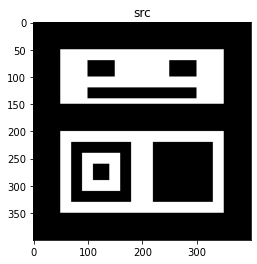

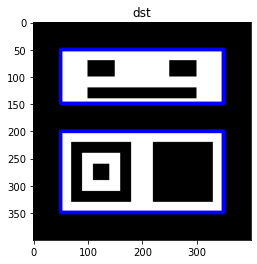

In [16]:
contours, _ = cv2.findContours(src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
cv2.drawContours(dst, contours, -1, (255,0,0), 5)
imshow('src', src); plt.show()
imshow('dst', dst); plt.show()

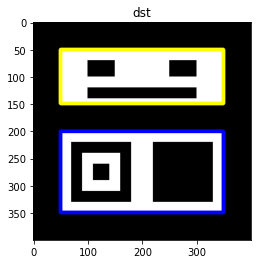

In [17]:
cs = [(255,0,0), (0,255,255)]
for i in range(len(contours)):
        cv2.drawContours(dst, contours, i, cs[i], 5)
imshow('dst', dst)

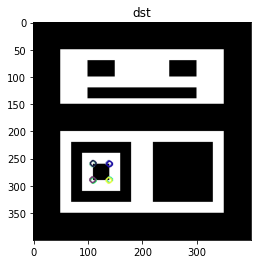

In [27]:
contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(len(contours[0])):
        c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        p = contours[0][i][0]#0번째 컨투어의 i번째 포인트
        cv2.circle(dst, (p[0], p[1]), 5, c, 2)       
      

imshow('dst', dst); plt.show()#원이 8개이다. 

## connectedComponetWithStats()함수가 리턴하는 정보에 대해서  모두 설명하시오
retval : 객체의 개수이다. N을 반환하면 [0,N-1]의 레이블이 존재하며, 0은 배경을 의미한다. 따라서 실제 흰색 객체의 개수는 N-1개이다.  

labels : 출력 레이블 맵 행렬로써, 입력영상과 같은크기의 numpy.ndarray를 반환한다.  


stats : 각 객체의 바운딩 박스, 픽셀 개수 정보를 담은 행렬이다.   

       numpy.ndarray.shape=(N,5),dtype=numpy.int32 이다.  

centroids : 각 객체의 무게 중심 위치 정보를 담은 행렬로써 numpy.ndarray.shape=(N,2),dtype=numpy.float64 구조를 같는다.  



## 외곽선 추출시 RETR_CCOMP와  RETR_TREE의 차이점에 대해서 구체적으로 설명하시오.
RETR_CCOMP : 모든 외곽선을 검색하고 2단계의 계층 구조를 구성한다. 즉, 쉽게말해 흰색 객체 외곽선은 무조건 최상위가 된다.  

RETR_TREE :  모든 외곽선을 검색하고 전체 계층 구조를 구성한다. 즉, 외곽선 안에 또다른 외곽선이 있으면 자식계층이된다.  



따라서 CCOMP의 경우 외곽선안에 또다른 외곽선이 있으면 둘다 최상위 계층이되어 좌우관계이지만  

TREE의 경우 외곽선안에 또다른 외곽선은 첫번째 외곽선의 자식계층이 된다.  

